# Compute climate projections from different GCM models and RCP

## Introduction

Nokebook for the workflow **Snakefile_climate_projections**: derives future climate statistics (expected temperature and precipitation change) for different RCPs and GCMs (from CMIP dataset).

In [1]:
# Import some python libraries we will need to run this notebook
import os
from IPython import display

## Choosing your climate datasets and scenarios

First thing is to prepare all the options for your project, this is done using the configuration or settings file below

In [2]:
# Add here the path where you have installed the blueearth-cst tool
cst_path = r'C:\Users\boisgont\D\Repos\CST\blueearth_cst'
os.chdir(cst_path)

To chose where the river or basin you want to work with, you will need to supply the location of your river.

The location can either be:
- for a basin to the sea, any point in the basin [x, y]
- for a subbasin (tributary or part of a basin) the location of the subbasin outlet [xout, yout]
- a bounding box [xmin, ymin, xmax, ymax]
- a geometry file of your region of interest (eg, myregion.shp)

The coordinates should be in EPSG 4326.
For points, you can use Google Maps to locate your coordinates.
For bounding box or point cooridnates, you can also copy-paste locations from this website: http://bboxfinder.com/

In [3]:
%%writefile ./config/my-project-settings.yml

###########################################################################################
#################################### General setting ######################################

# Path to where the wflow model will be stored (include the project name)
project_name: myModel
project_dir: examples/myModel

# Path to the data catalog to use (can be different for Linux/Windows/data stored on P drive or other)
data_sources: config/deltares_data.yml

# Time horizon of the historical period
starttime: "2000-01-01T00:00:00"
endtime: "2020-12-31T00:00:00"

###########################################################################################
#################################### Model building #######################################

# hydromt "region" for building the model, coordinates are in EPSG 4326
# for more info on how to fill this, you can see the hydromt documentation: 
# https://deltares.github.io/hydromt/latest/user_guide/cli.html#region-options
# For wflow please use either 'basin' or 'subbasin' keywords
model_region: "{'subbasin': [108.13800, 15.5414], 'strord':3}"
# Grid resolution of the model in degrees
model_resolution: 0.0083333

# If available, please here put the path to the available observation stations locations files
# csv file containing three columns: station_ID, x, y
output_locations: None # If set to None, will default to the wflow outlets
# Path to the file with observed discharge timeseries per station 
observations_timeseries: None
    


Overwriting ./config/my-project-settings.yml


## Running the model building workflow

The first line is to create an image of our workflow with snakemake to verify that all our settings are well taken into account.

In [4]:
! snakemake -s Snakefile_model_creation --configfile config/my-project-settings.yml  --dag | dot -Tpng > dag_model_building.png

Building DAG of jobs...


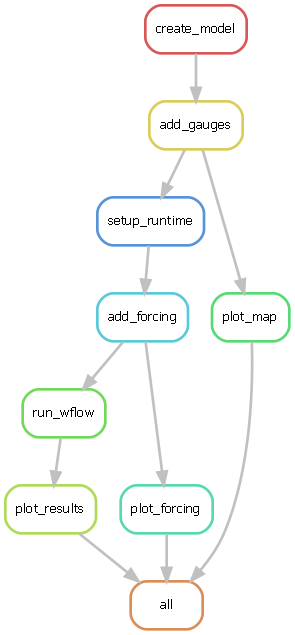

In [5]:
display.Image("./dag_model_building.png")

Now we will unlock your directory in order to save the future results of the workflow. This step is most of the time not necessary.

In [6]:
! snakemake --unlock -s Snakefile_model_creation --configfile config/my-project-settings.yml

Unlocking working directory.


And finally let's run our worflow:

In [ ]:
! snakemake all -c 1 -s Snakefile_model_creation --configfile config/my-project-settings.yml

## Results

First check that snake did run everything.

In [ ]:
! snakemake -s Snakefile_model_creation --configfile config/my-project-settings.yml  --dag | dot -Tpng > dag_model_building.png

In [ ]:
display.Image("./dag_model_building.png")

Let's see which files where created in our output folder.

In [ ]:
root = "examples/myModel"
for path, _, files in os.walk(root):
    print(path)
    for name in files:
        if name.endswith(".xml"):
            continue
        print(f" - {name}")